Here, we are going to use MNIST database.

The <strong>MNIST database</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.

The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

In [1]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

The Keras library conveniently includes the MNIST dataset as part of its API.

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.

In [3]:
# import the data
from keras.datasets import mnist

# read the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.

Let's visualize the first image in the training set using Matplotlib's scripting layer.


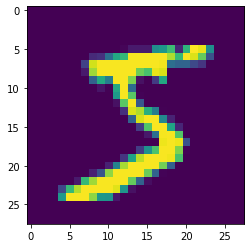

In [5]:
plt.imshow(X_train[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [6]:
# flatten images into one-dimensional vector
num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # flatten training images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # flatten test images

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [7]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.

In [8]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


### Buliding the Neural Network

In [9]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train and Test the network

In [10]:
# build the model
model = classification_model()

In [11]:
# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)


Epoch 1/10
1875/1875 - 15s - loss: 0.1852 - accuracy: 0.9429 - val_loss: 0.0974 - val_accuracy: 0.9717 - 15s/epoch - 8ms/step
Epoch 2/10
1875/1875 - 13s - loss: 0.0779 - accuracy: 0.9753 - val_loss: 0.0807 - val_accuracy: 0.9746 - 13s/epoch - 7ms/step
Epoch 3/10
1875/1875 - 13s - loss: 0.0549 - accuracy: 0.9822 - val_loss: 0.0672 - val_accuracy: 0.9806 - 13s/epoch - 7ms/step
Epoch 4/10
1875/1875 - 13s - loss: 0.0400 - accuracy: 0.9872 - val_loss: 0.0617 - val_accuracy: 0.9824 - 13s/epoch - 7ms/step
Epoch 5/10
1875/1875 - 13s - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0748 - val_accuracy: 0.9800 - 13s/epoch - 7ms/step
Epoch 6/10
1875/1875 - 15s - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0652 - val_accuracy: 0.9836 - 15s/epoch - 8ms/step
Epoch 7/10
1875/1875 - 13s - loss: 0.0227 - accuracy: 0.9925 - val_loss: 0.0691 - val_accuracy: 0.9835 - 13s/epoch - 7ms/step
Epoch 8/10
1875/1875 - 13s - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.0785 - val_accuracy: 0.9820 - 13s/epoch - 7

In [12]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Let's print the accuracy and the corresponding error.

In [13]:
print('Accuracy: {}% \n Error: {}'.format(scores[1]*100, 1 - scores[1]))        

Accuracy: 97.93000221252441% 
 Error: 0.02069997787475586


We can save model using *.save()*

In [14]:
model.save('classification_model.h5')

Since our model contains multidimensional arrays of data, then models are usually saved as .h5 files.

When you are ready to use your model again, you use the ***load_model*** function from <strong>keras.models</strong>.


In [15]:
from keras.models import load_model

In [16]:
pretrained_model = load_model('classification_model.h5')

Now, we can use model to predict the class.